# Artificial Intelligence 2022-2023 Fall Semester - Nişantaşı University 


<h3 align: right> Student: Nourlhouda Osghir </h3>
<h3 align: left> ID:20202022136  </h3>
<p> Choosed projct : Vehicle detection and human , Confirmed project: Vehicle and human detection  </p>
<h2> Introduction </h2>
<p> Pedestrian detection is a rapidly evolving area in computer vision with key applications in intelligent vehicles, surveillance, and advanced robotics. The objective of this project is to provide an overview of the current state of the art from both methodological and experimental perspectives.  We cover the main components of a pedestrian detection system and the underlying models. Experiments are performed on an extensive data set captured onboard a vehicle driving through urban environment. The data set includes many thousands of training samples. We consider a generic evaluation setting and one specific to pedestrian detection onboard a vehicle. We select OpenCV as the development tool for implementation of cars and pedestrian detection in a video segment. This application will be developed in Python using OpenCV.The reported results highlight the importance of testing pedestrian detection systems on different datasets to evaluate the robustness of the computed groups of features used as input to classifiers.
</p>

### Used data set: https://drive.google.com/file/d/1eFHCDqc7NU308W_6mCK8ngM7E9MqoXeD/view?usp=sharing

In [6]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import itertools
import datetime as dt
import tensorflow as tf
from skimage import data, io, filters
import skimage
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
#SCALER & TRANSFORMATION

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, roc_auc_score, roc_curve ,f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from tensorflow.keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)


In [33]:
path="C:\\Users\\loulo\\Documents\\AI project\\Dset-set"

##  Data Analysis:

## Data distribution and viualisation

In [7]:
vehicles=pd.read_csv("C:\\Users\\loulo\\Documents\\AI project\\Dset-set\\csv_vehicles.csv")
pedestrain=pd.read_csv("C:\\Users\\loulo\\Documents\\AI project\\Dset-set\\csv_pedestrian.csv")

In [8]:
vehicles

,Filename,Height,Width,Channels,Size,Red,Green,Blue
0,1.png,64,64,3,12288,392134,391117,403394
1,10.png,64,64,3,12288,229218,224589,249310
2,100.png,64,64,3,12288,324623,318299,319846
3,101.png,64,64,3,12288,571831,611769,643221
4,102.png,64,64,3,12288,160214,177261,191782
...,...,...,...,...,...,...,...,...
779,95.png,64,64,3,12288,195313,206412,209423
780,96.png,64,64,3,12288,256218,280664,285546
781,97.png,64,64,3,12288,188954,208770,231049
782,98.png,64,64,3,12288,290451,304273,307212


In [9]:
pedestrain

,Filename,Height,Width,Channels,Size,Red,Green,Blue
0,0.png,89,38,3,10146,196775,197895,182660
1,1.png,90,36,3,9720,144156,132321,143802
2,10.png,115,38,3,13110,222559,210283,220664
3,100.png,115,40,3,13800,456811,393283,389934
4,101.png,218,102,3,66708,1497461,1447653,1498231
...,...,...,...,...,...,...,...,...
779,95.png,243,110,3,80190,2887828,2588112,2557463
780,96.png,236,98,3,69384,2409135,2134856,2296649
781,97.png,211,61,3,38613,1298844,1203675,1199775
782,98.png,156,65,3,30420,993995,912913,908064


<h3>View of the mean,standart deviation and the median of one of the labels in the data set </h3>
<p> Exemple: Xmin label </p>

<h2>Visualisation of the data set </h2>
<p> intialing a new table that contanis only the numerical values of the "sample" 
<br> implement the table to get a histogram for each colum in that table
</p>

In [11]:
#table of the records
#to get rid of file and name columns
veh_rec=vehicles[["Height","Width","Channels","Red","Green","Blue"]]
veh_rec

,Height,Width,Channels,Red,Green,Blue
0,64,64,3,392134,391117,403394
1,64,64,3,229218,224589,249310
2,64,64,3,324623,318299,319846
3,64,64,3,571831,611769,643221
4,64,64,3,160214,177261,191782
...,...,...,...,...,...,...
779,64,64,3,195313,206412,209423
780,64,64,3,256218,280664,285546
781,64,64,3,188954,208770,231049
782,64,64,3,290451,304273,307212


In [13]:
ped_rec=vehicles[["Height","Width","Channels","Red","Green","Blue"]]
ped_rec

,Height,Width,Channels,Red,Green,Blue
0,64,64,3,392134,391117,403394
1,64,64,3,229218,224589,249310
2,64,64,3,324623,318299,319846
3,64,64,3,571831,611769,643221
4,64,64,3,160214,177261,191782
...,...,...,...,...,...,...
779,64,64,3,195313,206412,209423
780,64,64,3,256218,280664,285546
781,64,64,3,188954,208770,231049
782,64,64,3,290451,304273,307212


## Histogram visualisation of all the labels in the data set

<AxesSubplot:xlabel='Blue', ylabel='Density'>

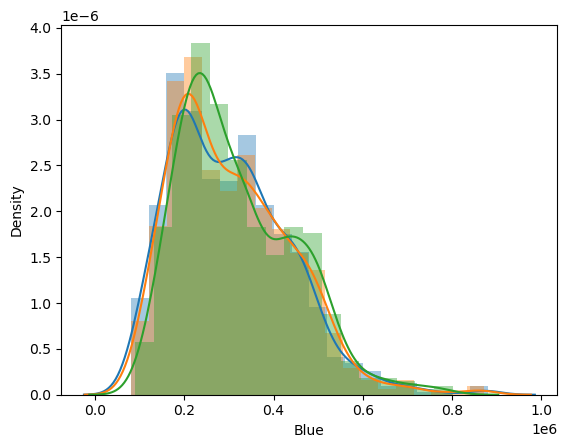

In [14]:
sns.distplot(vehicles["Red"])
sns.distplot(vehicles["Green"])
sns.distplot(vehicles["Blue"])
# Safe to ignore warnings

<h3>Histogram of the Distribution of the labels </h3>


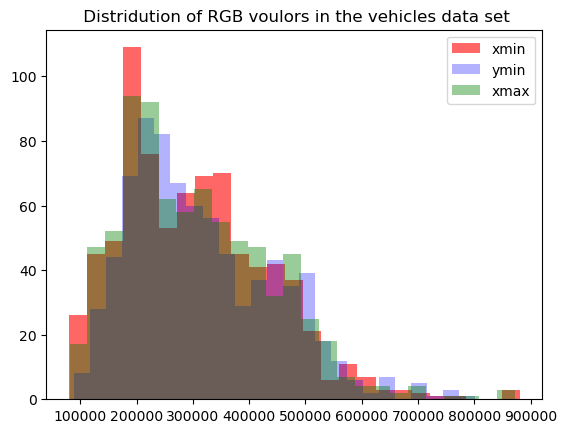

In [28]:
plt.hist(vehicles["Red"], bins=25, alpha=0.6, color='red')
plt.hist(vehicles["Blue"], bins=25, alpha=0.3, color='blue')
plt.hist(vehicles["Green"], bins=25, alpha=0.4, color='green')
plt.title(" Distridution of RGB voulors in the vehicles data set")
plt.legend(['xmin','ymin','xmax','ymax'])
plt.show()

## VISUALISATION

In [167]:
Main_PNG_Path = Path(path)
PNG_Path = list(Main_PNG_Path.glob(r"*/*.png"))


In [168]:
#png labels
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [171]:
#to series
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [172]:
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [175]:
#TO DATAFRAME
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)
#REPLACING VALUE NAME
Main_Data["CATEGORY"].replace({"non-vehicles":"no_vehicles"},inplace=True)

In [177]:
#SHUFFLING
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [178]:
plt.style.use("classic")


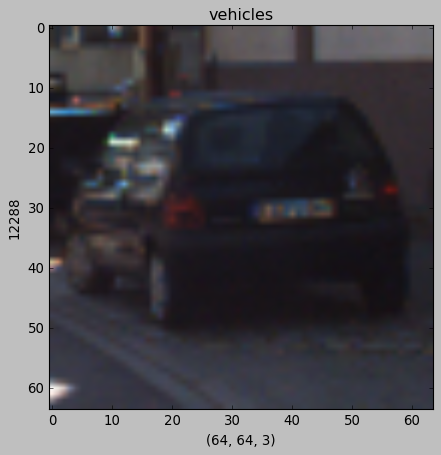

In [179]:
Example_I = cv2.imread(Main_Data["PNG"][44])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][44])
plt.imshow(Example_I)

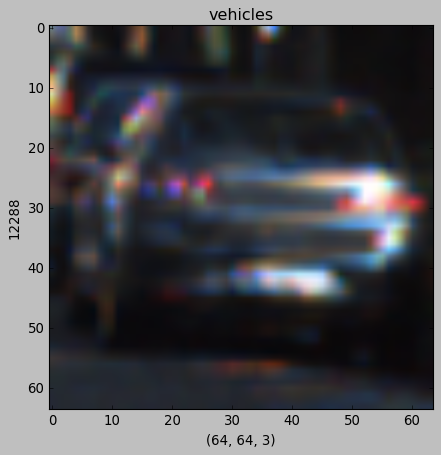

In [180]:
Example_I = cv2.imread(Main_Data["PNG"][2])
Example_I = cv2.cvtColor(Example_I,cv2.COLOR_BGR2RGB)
plt.xlabel(Example_I.shape)
plt.ylabel(Example_I.size)
plt.title(Main_Data["CATEGORY"][2])
plt.imshow(Example_I)

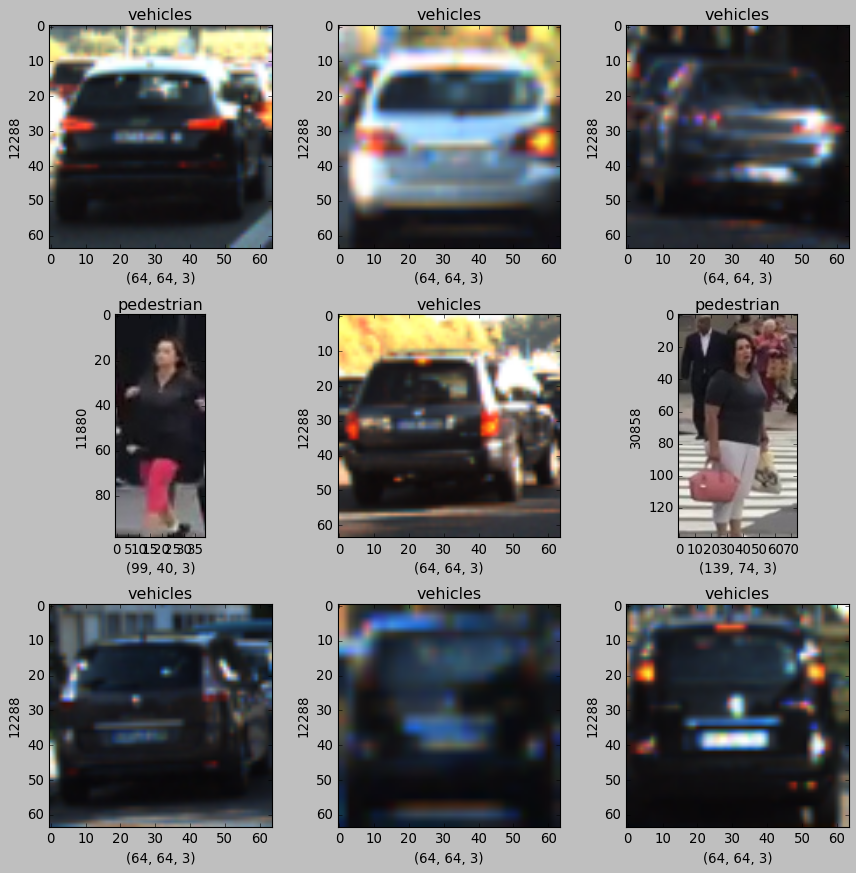

In [200]:
figure,axis = plt.subplots(nrows=3,ncols=3,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Main_Data["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Main_Data["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

In [193]:
ped_Img = Main_Data[Main_Data["CATEGORY"] == "pedestrian"]
V_Img = Main_Data[Main_Data["CATEGORY"] == "vehicles"]

ped_Img = Non_V_Img.reset_index()
V_Img = V_Img.reset_index()

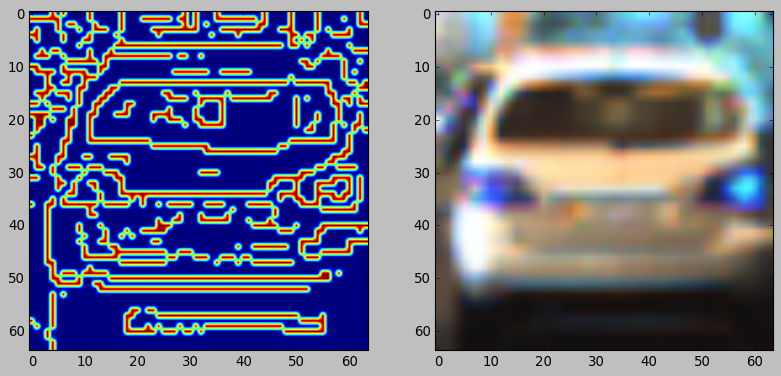

In [186]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][1])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

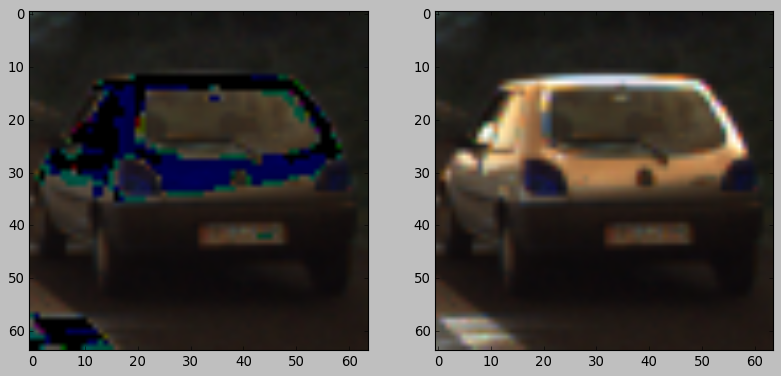

In [187]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)


axis[0].imshow(Threshold_I)
axis[1].imshow(E_IMG)

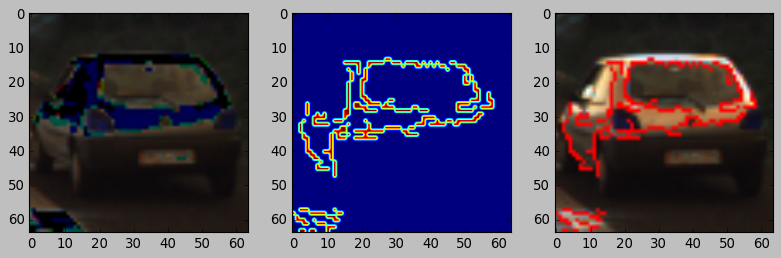

In [188]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(V_Img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)


axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

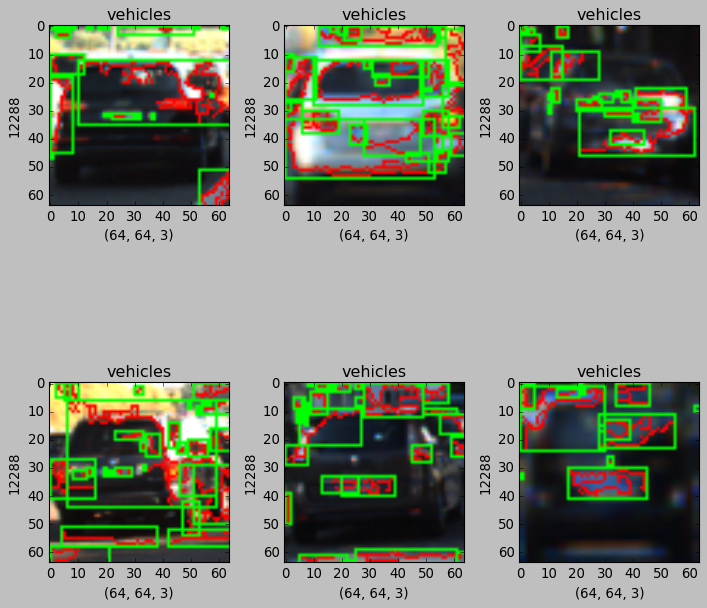

In [190]:
figure,axis = plt.subplots(nrows=2,ncols=3,figsize=(9,10))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = V_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    _,Thre_Img = cv2.threshold(Exp_Im,100,255,cv2.THRESH_TOZERO_INV)
    C_IMG = cv2.Canny(Thre_Img,90,450)
    contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Img = cv2.drawContours(Exp_Im,contours,-1,(255,0,0),1)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)
        
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

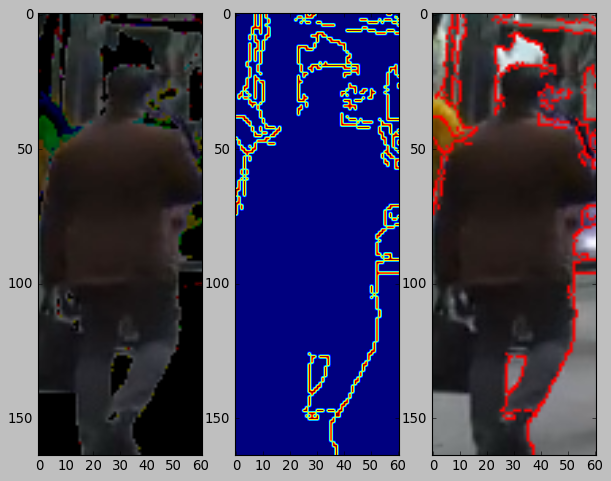

In [195]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(9,10))

E_IMG = cv2.imread(ped_Img["PNG"][61])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)


axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

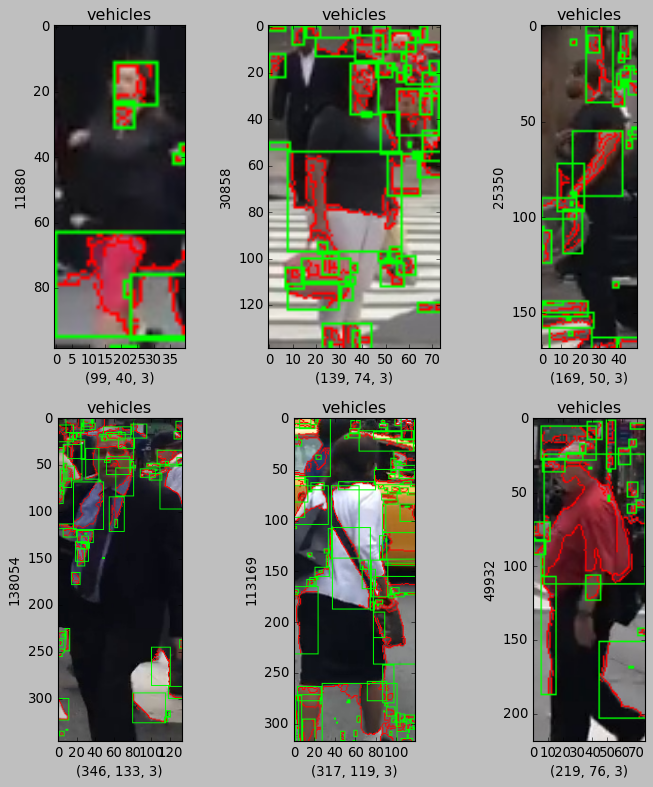

In [196]:
figure,axis = plt.subplots(nrows=2,ncols=3,figsize=(9,10))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = ped_Img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    _,Thre_Img = cv2.threshold(Exp_Im,100,255,cv2.THRESH_TOZERO_INV)
    C_IMG = cv2.Canny(Thre_Img,90,450)
    contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Img = cv2.drawContours(Exp_Im,contours,-1,(255,0,0),1)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)
        
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(V_Img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

# Loading the dataset

In [82]:
# Selecting Dataset Folder Paths
dir_ = Path(path)
filepaths = list(dir_.glob(r'**/*.png'))
# Mapping the labels
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

# Paths & labels femalee eyes
filepaths = pd.Series(filepaths, name = 'File').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenating...
df = pd.concat([filepaths, labels], axis=1)
df = df.sample(frac = 1, random_state = 56).reset_index(drop = True)

In [44]:
trainset_df, testset_df = train_test_split(df, train_size = 0.90, random_state = 42)

display(trainset_df.head())

testset_df.head()

,File,Label
162,C:\Users\loulo\Documents\AI project\Dset-set\v...,vehicles
1554,C:\Users\loulo\Documents\AI project\Dset-set\v...,vehicles
352,C:\Users\loulo\Documents\AI project\Dset-set\v...,vehicles
518,C:\Users\loulo\Documents\AI project\Dset-set\p...,pedestrian
44,C:\Users\loulo\Documents\AI project\Dset-set\p...,pedestrian


,File,Label
1535,C:\Users\loulo\Documents\AI project\Dset-set\v...,vehicles
983,C:\Users\loulo\Documents\AI project\Dset-set\p...,pedestrian
432,C:\Users\loulo\Documents\AI project\Dset-set\p...,pedestrian
962,C:\Users\loulo\Documents\AI project\Dset-set\p...,pedestrian
976,C:\Users\loulo\Documents\AI project\Dset-set\p...,pedestrian


In [45]:
# converting the Label to a numeric format for testing later...
LE = LabelEncoder()

y_test = LE.fit_transform(testset_df["Label"])

In [83]:
labels = ['vehicles', 'pedestrian']
img_size = 64
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [108]:
#Now we can easily fetch our train and validation data.
data = get_data(path)

In [109]:
df=pd.DataFrame(data,columns=['image','label'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [111]:
X_train=change_image_dimension(X_train)
X_val=change_image_dimension(X_val)
X_test=change_image_dimension(X_test)
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0
X_label=np.array(y_train,dtype=int)
val_label=np.array(y_val,dtype=int)
y_test=np.array(y_test,dtype=int)

##  Generating batches of images

**Changing Dimension Of Data for the first trainig method**

In [112]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),img_size,img_size,3))
    return data

In [113]:
# Viewing data in training dataset
print('Training Dataset:')

print(f'Number of images: {trainset_df.shape[0]}')

print(f'Number of images with malee eyes: {trainset_df["Label"].value_counts()[0]}')
print(f'Number of images with femalee eyes: {trainset_df["Label"].value_counts()[1]}\n')

# Viewing data in test dataset
print('Test Dataset:')

print(f'Number of images: {testset_df.shape[0]}')
#faute 
print(f'Number of images with malee eyes: {testset_df["Label"].value_counts()[0]}')
print(f'Number of images with femalee eyes: {testset_df["Label"].value_counts()[1]}\n')

Training Dataset:
Number of images: 1411
Number of images with malee eyes: 706
Number of images with femalee eyes: 705

Test Dataset:
Number of images: 157
Number of images with malee eyes: 79
Number of images with femalee eyes: 78



**- Data Preprocessing and Data Augmentation** 

Next, we perform some Data Preprocessing and Data Augmentation before we can proceed with building the model.

In [114]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [115]:
print("Preparing the training dataset ...")
training_set = train_datagen.flow_from_dataframe(
    dataframe = trainset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")

print("Preparing the validation dataset ...")
validation_set = train_datagen.flow_from_dataframe(
    dataframe = trainset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")

print("Preparing the test dataset ...")
test_set = test_datagen.flow_from_dataframe(
    dataframe = testset_df,
    x_col = "File",
    y_col = "Label",
    target_size = (75, 75),
    color_mode ="rgb",
    class_mode = "binary",
    shuffle = False,
    batch_size = 32)

print('Data generators are ready!')

Preparing the training dataset ...
Found 1270 validated image filenames belonging to 2 classes.
Preparing the validation dataset ...
Found 141 validated image filenames belonging to 2 classes.
Preparing the test dataset ...
Found 157 validated image filenames belonging to 2 classes.
Data generators are ready!


In [116]:
# Callbacks
cb = [EarlyStopping(monitor = 'loss', mode = 'min', patience = 5, restore_best_weights = True)]

#  Directory of training, validation and test images

## - Define the Model 

<p>first trianing on the data set is with a simple sequential model of 3 layers</p>

In [201]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.summary()
##MaxPool2D

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)        

In [118]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [119]:
history = model.fit(X_train,X_label,epochs = 25 ,batch_size=10, validation_data = (X_val, val_label))

Epoch 1/25
94/94 [==============================] - 14s 92ms/step - loss: 0.6533 - accuracy: 0.6649 - val_loss: 0.6277 - val_accuracy: 0.5478
Epoch 2/25
94/94 [==============================] - 7s 69ms/step - loss: 0.4673 - accuracy: 0.7968 - val_loss: 0.3647 - val_accuracy: 0.8822
Epoch 3/25
94/94 [==============================] - 6s 67ms/step - loss: 0.2765 - accuracy: 0.8957 - val_loss: 0.2355 - val_accuracy: 0.9204
Epoch 4/25
94/94 [==============================] - 6s 65ms/step - loss: 0.1674 - accuracy: 0.9457 - val_loss: 0.2264 - val_accuracy: 0.8981
Epoch 5/25
94/94 [==============================] - 5s 56ms/step - loss: 0.1201 - accuracy: 0.9649 - val_loss: 0.1153 - val_accuracy: 0.9490
Epoch 6/25
94/94 [==============================] - 5s 57ms/step - loss: 0.0816 - accuracy: 0.9713 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 7/25
94/94 [==============================] - 6s 60ms/step - loss: 0.0650 - accuracy: 0.9819 - val_loss: 0.0650 - val_accuracy: 0.9777
Epoch 8/25
9

In [120]:
Model_Results = model.evaluate(X_test,y_test)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

10/10 [==============================] - 1s 40ms/step - loss: 0.0665 - accuracy: 0.9713
LOSS:  0.0665
ACCURACY:  0.97


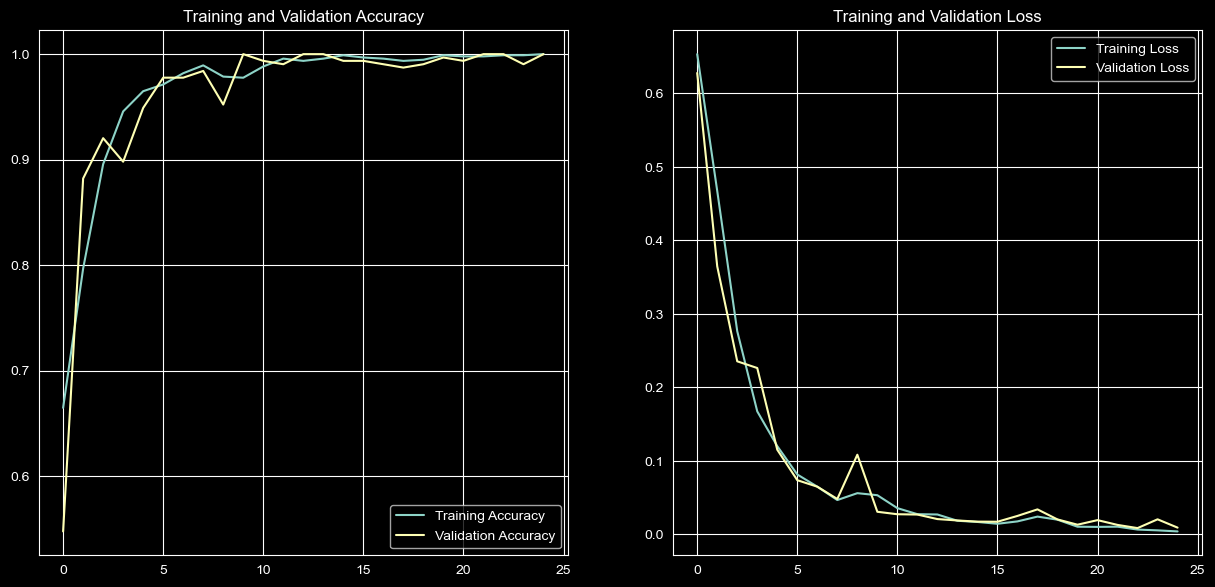

In [123]:
plt.style.use("dark_background")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [124]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 1s 34ms/step - loss: 0.0665 - accuracy: 0.9713


[0.06645240634679794, 0.9713375568389893]

In [126]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       157
           1       0.95      1.00      0.97       157

    accuracy                           0.97       314
   macro avg       0.97      0.97      0.97       314
weighted avg       0.97      0.97      0.97       314



(<Figure size 800x700 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

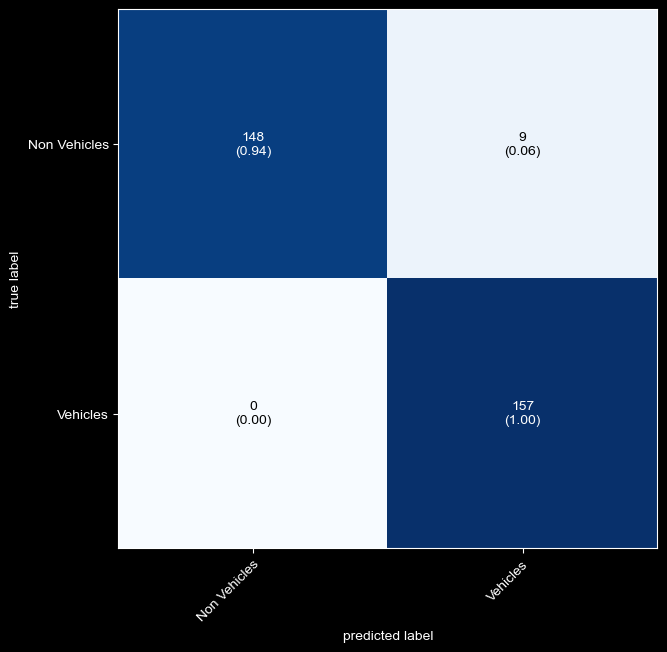

In [128]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
plt.style.use("dark_background")
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names =['Non Vehicles', 'Vehicles'],
                     show_normed = True)

> Actual vs Predicted Result:

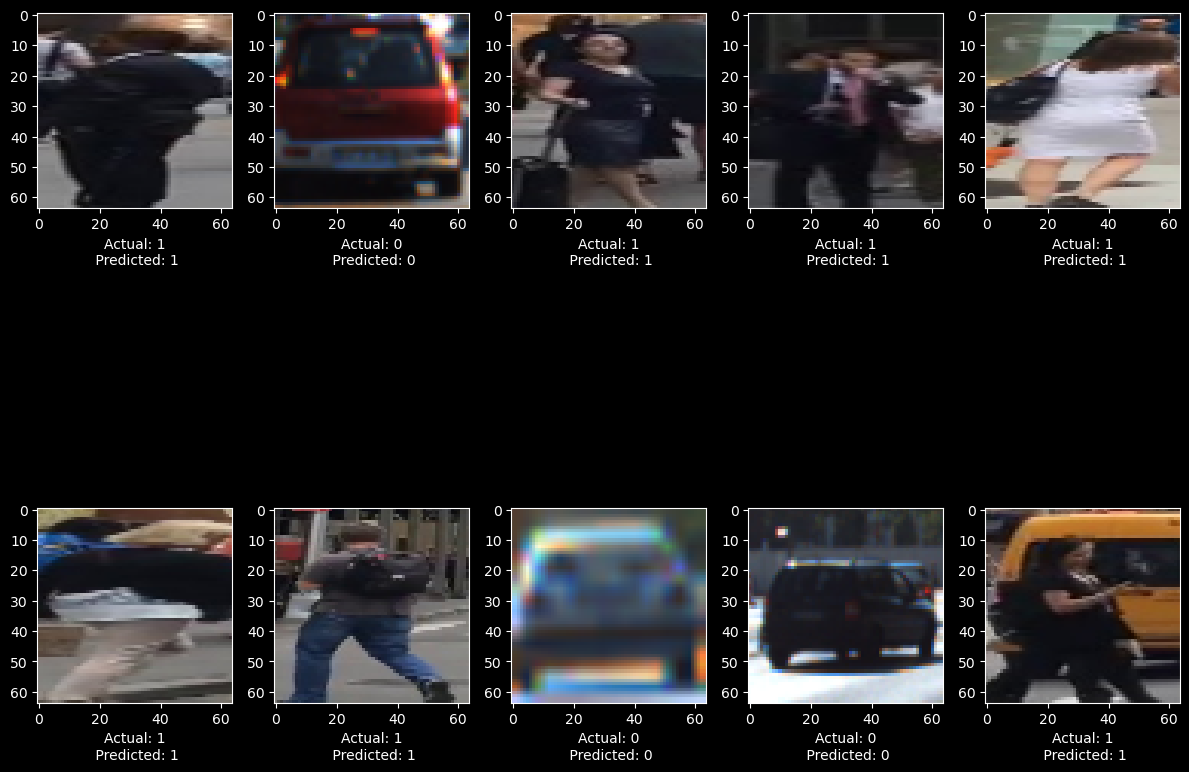

In [68]:
plt.figure(figsize=(12,12))
for i in range(10):
    sample_idx = np.random.choice(range(len(X_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[sample_idx])
    plt.xlabel(f"Actual: {y_test[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

## Construction of the (MobileNet) model
The MobileNet model proposed by Howard et al. (2017), is a CNN architecture that were created to perform computer vision tasks on mobile devices and embedded systems. They are based on in-depth separable convolution operations, which lessens the burden of operations in the first layers.

<p><img src = "https://nitheshsinghsanjay.github.io/images/mobtiny_fig.PNG" alt></p>

######  - Dense Neural Networks

###### Step 1 - Base model creation

    input_shape - Setting the height/width and RGB channels (75, 75, 3)
    include_top - Fully connected layer will not be included on top
    weights - Pre-training using imagenet

In [132]:
CNN_base_mobilenet = MobileNet(input_shape = (75, 75, 3), include_top = False, weights = 'imagenet')

In [133]:
for layer in CNN_base_mobilenet.layers:
    layer.trainable = False

In [134]:
CNN_mobilenet = Sequential()
CNN_mobilenet.add(BatchNormalization(input_shape = (75, 75, 3)))
CNN_mobilenet.add(CNN_base_mobilenet)
CNN_mobilenet.add(BatchNormalization())
CNN_mobilenet.add(GlobalAveragePooling2D())
CNN_mobilenet.add(Dropout(0.5))
CNN_mobilenet.add(Dense(1, activation = 'sigmoid'))

CNN_mobilenet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 75, 75, 3)        12        
 hNormalization)                                                 
                                                                 
 mobilenet_1.00_224 (Functio  (None, 2, 2, 1024)       3228864   
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 2, 2, 1024)       4096      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1024)             

In [135]:
# Callbacks
cb = [EarlyStopping(monitor = 'loss', mode = 'min', patience = 5, restore_best_weights = True)]

In [136]:
#even after installing the required libraries, its  not working
plot_model(CNN_mobilenet, show_layer_names = True , show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


######  - Model compilation and training

Now that we have specified the model architecture, we will compile the model for training. For this, we need to specify the loss function (what we are trying to minimize), the optimizer (how we want to do to minimize the loss) and the metric (how we will judge the model's performance). Next, we will call .fit to start training the process.

``Compile`` parameters:

     optimizer - descent of the gradient and descent of the stochastic gradient
     loss - Loss function (binary_crossentropy as there is only one exit)
     metrics - Evaluation metrics (obs - more than one can be placed)

``Fit`` parameters:

     train_data - training database
     epochs - number of seasons
     validation_data - test database
     callbacks - Using EarlyStopping
     validation_steps - number of images to validation

In [137]:
import datetime as dt
# Compilation
CNN_mobilenet.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])

# Start of counting time
start = dt.datetime.now()

# Training and validation
CNN_mobilenet_history = CNN_mobilenet.fit(training_set, epochs = 10, validation_data = validation_set, callbacks = cb)

# End of Time Counting
end = dt.datetime.now()
time_CNN_mobilenet = end - start
print ('\nTraining and validation time: ', time_CNN_mobilenet)

Epoch 1/10
40/40 [==============================] - 46s 1s/step - loss: 0.3353 - accuracy: 0.8535 - val_loss: 0.1725 - val_accuracy: 0.9645
Epoch 2/10
40/40 [==============================] - 18s 436ms/step - loss: 0.1333 - accuracy: 0.9472 - val_loss: 0.0966 - val_accuracy: 0.9716
Epoch 3/10
40/40 [==============================] - 18s 441ms/step - loss: 0.1037 - accuracy: 0.9622 - val_loss: 0.0416 - val_accuracy: 0.9858
Epoch 4/10
40/40 [==============================] - 17s 431ms/step - loss: 0.1048 - accuracy: 0.9661 - val_loss: 0.0431 - val_accuracy: 0.9858
Epoch 5/10
40/40 [==============================] - 18s 456ms/step - loss: 0.0746 - accuracy: 0.9717 - val_loss: 0.0405 - val_accuracy: 0.9858
Epoch 6/10
40/40 [==============================] - 17s 424ms/step - loss: 0.0842 - accuracy: 0.9654 - val_loss: 0.0727 - val_accuracy: 0.9787
Epoch 7/10
40/40 [==============================] - 17s 420ms/step - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0380 - val_accuracy: 0.9858
Ep

In [138]:
score_mn = CNN_mobilenet.evaluate(test_set)
print("Test Loss:", score_mn[0])
print("Test Accuracy:", score_mn[1])

5/5 [==============================] - 4s 981ms/step - loss: 0.0073 - accuracy: 1.0000
Test Loss: 0.007272534538060427
Test Accuracy: 1.0


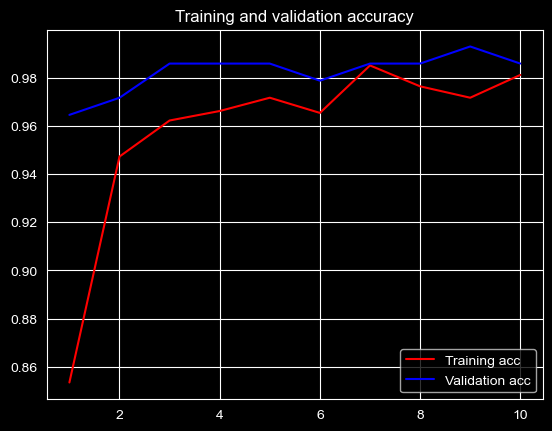

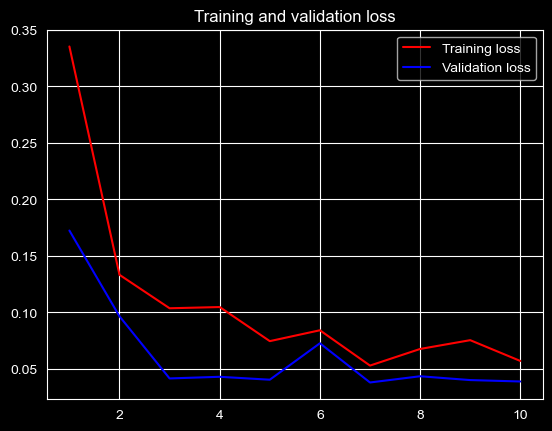

In [140]:
plt.style.use("dark_background")
acc = CNN_mobilenet_history.history['accuracy']
val_acc = CNN_mobilenet_history.history['val_accuracy']
loss = CNN_mobilenet_history.history['loss']
val_loss = CNN_mobilenet_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       157
           1       0.96      0.99      0.97       157

    accuracy                           0.97       314
   macro avg       0.98      0.97      0.97       314
weighted avg       0.98      0.97      0.97       314



(<Figure size 600x700 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

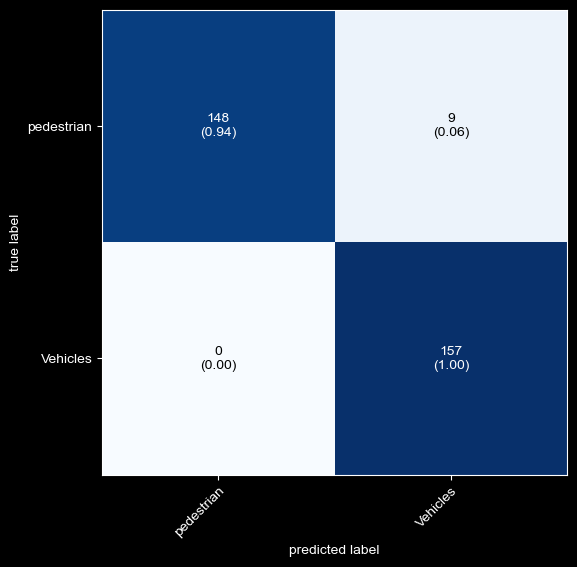

In [141]:
plt.style.use("dark_background")
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(6,7),class_names =['pedestrian', 'Vehicles'],
                     show_normed = True)

In [142]:
roc_mn = roc_auc_score(y_test, y_pred)
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
fpr_mn, tpr_mn, _ = roc_curve(y_test, y_pred)

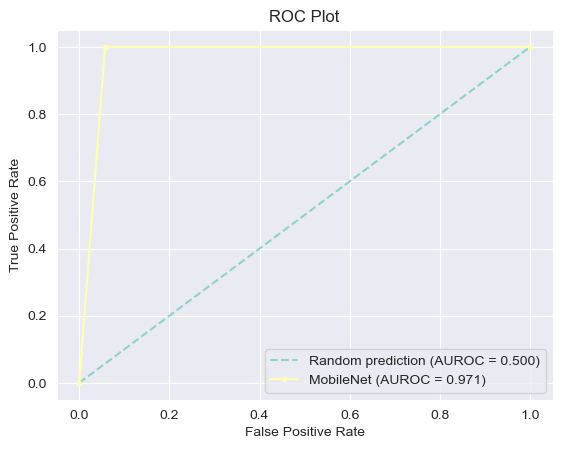

In [144]:

sns.set_style('darkgrid')

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(fpr_mn, tpr_mn, marker='.', label='MobileNet (AUROC = %0.3f)' % roc_mn)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()